<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/QuinnWorks_134_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

cdf = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.sample(5)

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
444   9110127         M  ...                  0.08225          NaN
340     89813         B  ...                  0.08764          NaN
132  86730502         M  ...                  0.07619          NaN
66     859464         B  ...                  0.09211          NaN
138    868826         M  ...                  0.07147          NaN

[5 rows x 33 columns]

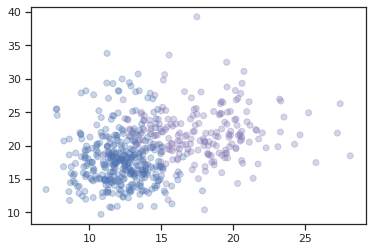

In [0]:
#SCATTER PLOT USING Y VALUE TO COLOR CLUSTERS
plt.scatter(df['radius_mean'],df['texture_mean'], alpha=.3, color=df['diagnosis'])
plt.show()

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df1 = df.drop('diagnosis', axis=1)
df1.head()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
0    842302        17.99  ...                  0.11890          NaN
1    842517        20.57  ...                  0.08902          NaN
2  84300903        19.69  ...                  0.08758          NaN
3  84348301        11.42  ...                  0.17300          NaN
4  84358402        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
#CHECKING FOR MISSING VALUES
df1.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
#DROPING COLUMN OF NaNs
df1= df1.dropna(axis='columns')

In [0]:
#DROPING COLUMN id
X = df1.drop('id', axis=1)

In [0]:
#DF OF X VALUES
print(X.shape)
X.sample(5)

(569, 30)


radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
299       10.510         23.09  ...          0.2227                  0.06777
554       12.880         28.92  ...          0.2372                  0.07242
140        9.738         11.97  ...          0.3105                  0.08151
492       18.010         20.56  ...          0.3251                  0.07625
495       14.870         20.21  ...          0.2369                  0.06599

[5 rows x 30 columns]

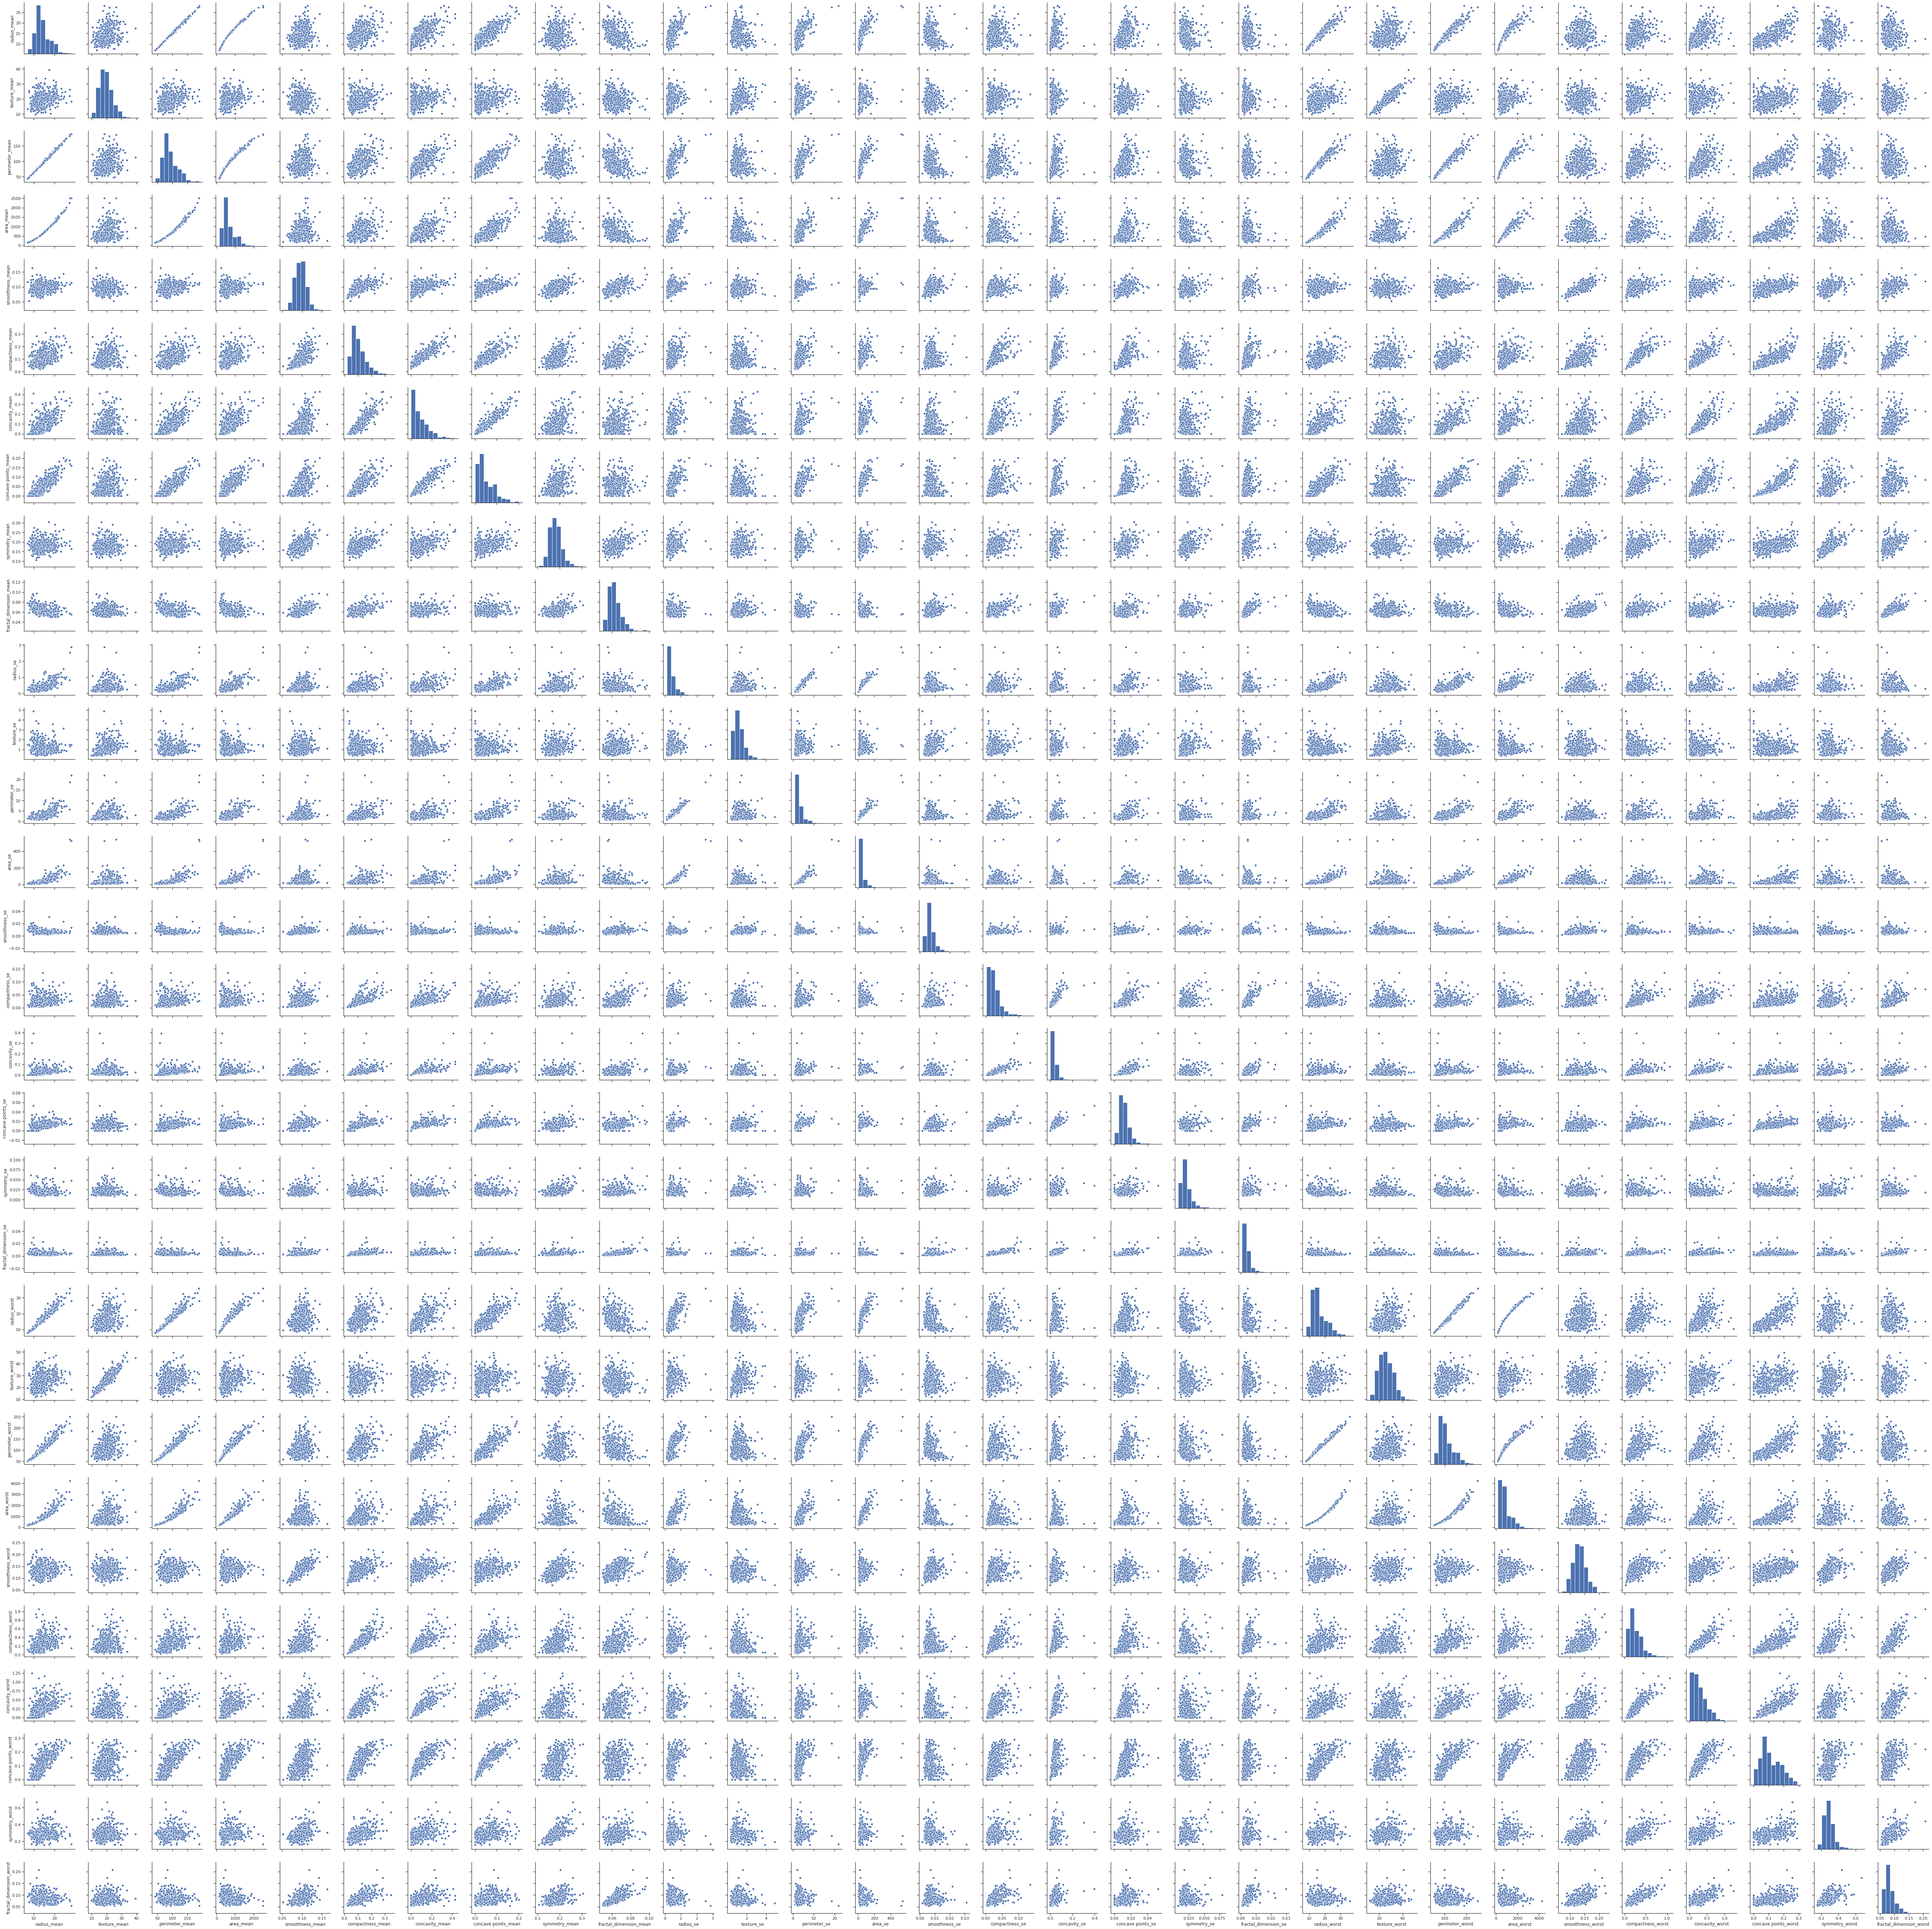

In [0]:
#Data Exploration: PAIRPLOT
import seaborn as sns

sns.set(style='ticks', color_codes=True)
q = sns.pairplot(X)

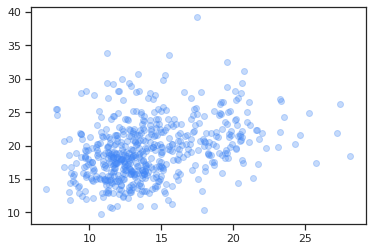

In [0]:
#Data Exploration: SCATTER PLOT of 
plt.scatter(X['radius_mean'],X['texture_mean'], alpha=.3, color=['#4287f5']);

In [0]:
#Data Exploration: ELBOW GRAPH
sum_of_squared_distances = []
K = range(1,11)
for k in K:
    kmean = KMeans(n_clusters=k) #instantiating kmeans instance
    kmean = kmean.fit(X)
    sum_of_squared_distances.append(kmean.inertia_)
sum_of_squared_distances

[256677243.9542025,
 77943099.87829883,
 47336610.421990566,
 29226541.651979793,
 20535235.908362117,
 16562261.629261008,
 13249736.06832689,
 11231884.682030208,
 9449324.996054048,
 8393356.988917453]

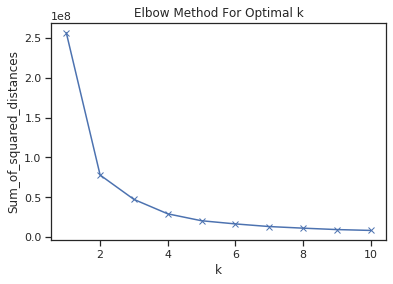

In [0]:
#ELBOW GRAPH: Looks like 2 clusters should be used
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#Clustering on the Dataset
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
print(kmeans.n_iter_)
print(labels)

3
[0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 

In [0]:
kmeans.cluster_centers_

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
Check = pd.DataFrame(df['diagnosis'])
Check['Cluster'] = labels
Check.columns=['Diagnosis','Cluster']
print(Check.shape)
Check.head(5)

(569, 2)


Diagnosis  Cluster
0         M        0
1         M        0
2         M        0
3         M        1
4         M        0

In [0]:
Check['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [0]:
Check['Cluster'].value_counts()

1    438
0    131
Name: Cluster, dtype: int64

In [0]:
#REPLACING Diagnosis to correct cluster label it should have
Check['Diagnosis'] = Check['Diagnosis'].replace({"B": 1, "M": 0})
Check

Diagnosis  Cluster
0            0        0
1            0        0
2            0        0
3            0        1
4            0        0
..         ...      ...
564          0        0
565          0        0
566          0        1
567          0        0
568          1        1

[569 rows x 2 columns]

In [0]:
(Check['Diagnosis'] == Check['Cluster']).value_counts()

True     486
False     83
dtype: int64

In [0]:
#Was about 85% accurate
(Check['Diagnosis'] == Check['Cluster']).value_counts()[1]/len(Check)

0.8541300527240774

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
#STANDARDIZE DATA 
scaler = StandardScaler()
Z = scaler.fit_transform(X)
Z[0:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [0]:
#PCA; capturing 90% of variance from all 30 columns
pca = PCA(.9)
Transformed_Data = pca.fit_transform(Z)

In [0]:
pca.explained_variance_ratio_.sum()

0.9100953006967308

In [0]:
#Number of PC that make up the .91 vars
len(Transformed_Data.T)

7

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component') 

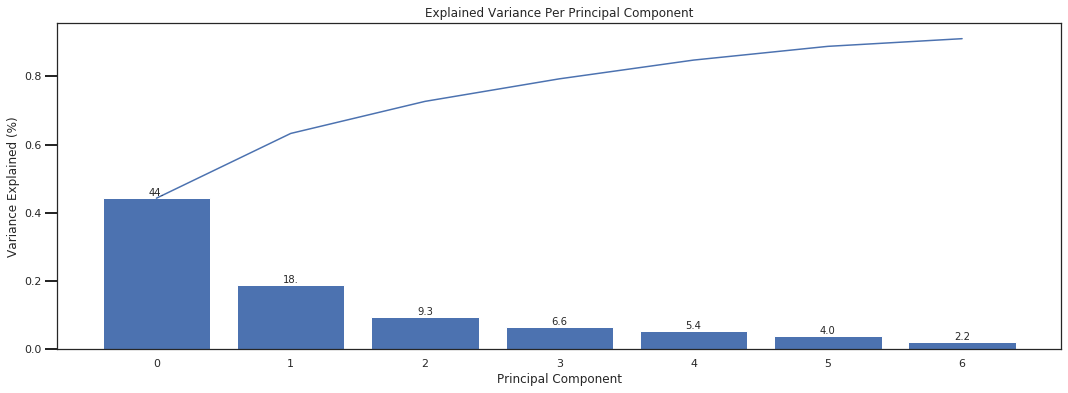

In [0]:
#SCREE PLOT 
scree_plot(pca)

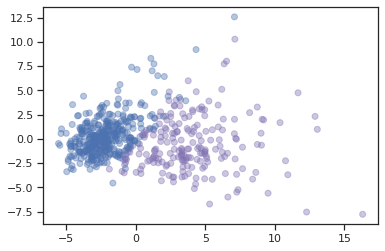

In [0]:
#SCATER PLOT PC1 VS PC2 ???
plt.scatter(Transformed_Data[:,0:1],Transformed_Data[:,1:2], alpha=.4, color = df['diagnosis'])
plt.show()

In [0]:
Transformed_Data.shape

(569, 7)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Transformed_Data)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [0]:
Check = pd.DataFrame({'Diagnosis': df['diagnosis'], 'Cluster': kmeans.labels_})

Check.head()

Diagnosis  Cluster
0         M        0
1         M        0
2         M        0
3         M        0
4         M        0

In [0]:
Check['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [0]:
Check['Diagnosis'] = Check['Diagnosis'].replace({"B":1, "M":0})
Check

Diagnosis  Cluster
0            0        0
1            0        0
2            0        0
3            0        0
4            0        0
..         ...      ...
564          0        0
565          0        0
566          0        0
567          0        0
568          1        1

[569 rows x 2 columns]

In [0]:
#91% accuracy rate
(Check['Diagnosis'] == Check['Cluster']).value_counts()[1]/len(Check)

0.9103690685413005

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project